# import module

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
# Get absolute path to the project root (one directory up from notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

print(project_root)

c:\Users\user\Desktop\Project\Adey_Innovations


# import customize file

In [6]:
import importlib.util
import sys
import os
module_path = r'C:\Users\user\Desktop\Project\Adey_Innovations\src\data_processing.py'
spec = importlib.util.spec_from_file_location("data_loader", module_path)
data_loader = importlib.util.module_from_spec(spec)
spec.loader.exec_module(data_loader)

# now you can access your function
load_data = data_loader.load_data

# test
print(load_data)

<function load_data at 0x00000294DC854540>


# Load data

In [7]:
fraud_df = load_data(r"C:\Users\user\Desktop\Project\Adey_Innovations\data\raw\Fraud_Data.csv")
ip_df= load_data(r"C:\Users\user\Desktop\Project\Adey_Innovations\data\raw\IpAddress_to_Country.csv")


# Data cleaning

In [8]:
# column name
print(fraud_df.head(),ip_df.head())

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0      lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China


In [9]:
# column information 
print(fraud_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


In [10]:
# statical data
print(fraud_df.describe())

             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [11]:
 # check missing values
print(fraud_df.isnull().sum()) 

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [12]:
# check duplicate
print(fraud_df.duplicated().sum())  

0


In [13]:
#missing value proportion
null_val_sums = fraud_df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
"Proportion": null_val_sums.values / len(fraud_df) })

,Column,Number of Null Values,Proportion
0,user_id,0,0.0
1,signup_time,0,0.0
2,purchase_time,0,0.0
3,purchase_value,0,0.0
4,device_id,0,0.0
5,source,0,0.0
6,browser,0,0.0
7,sex,0,0.0
8,age,0,0.0
9,ip_address,0,0.0


# data types

In [14]:
cat_cols = fraud_df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    fraud_df[col] = fraud_df[col].fillna(fraud_df[col].mode()[0])

In [15]:
num_cols = fraud_df.select_dtypes(include=["int64", "float64"]).columns
fraud_df[num_cols] = fraud_df[num_cols].fillna(fraud_df[num_cols].median())

# Correct Data Types

In [16]:
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])

fraud_df["class"] = fraud_df["class"].astype(int)


# Univariate analysis

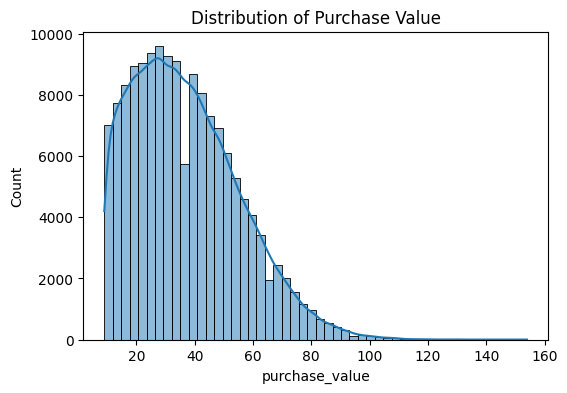

In [17]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(fraud_df["purchase_value"], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.show()


# Bivariate Analysis (Feature vs Target)

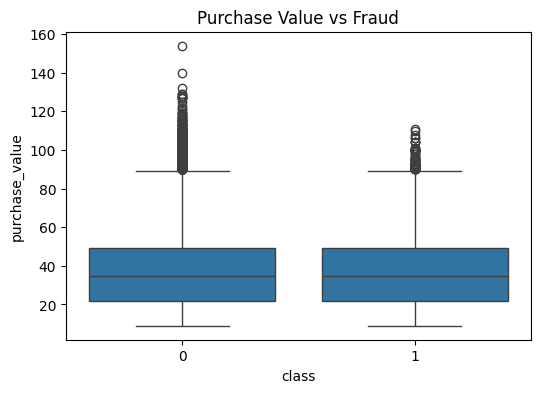

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()

# Class Distribution Analysis

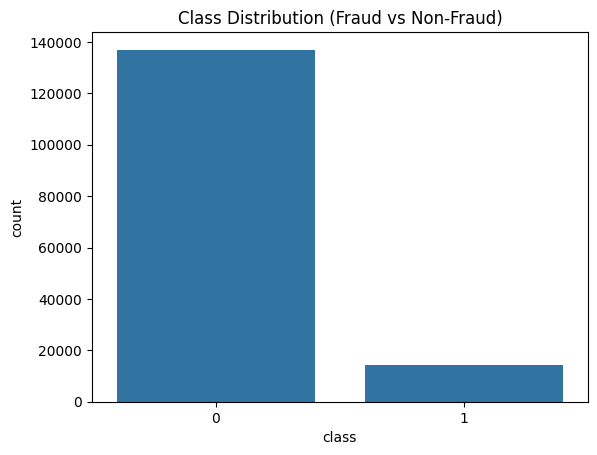

In [19]:
fraud_df["class"].value_counts(normalize=True)
sns.countplot(x="class", data=fraud_df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


# Convert IP Address to Integer

In [21]:
fraud_df["ip_address"] = fraud_df["ip_address"].astype(int)


# Merge Using Range-Based Lookup

In [22]:
ip_df = ip_df.rename(columns={
    "lower_bound_ip_address": "ip_from",
    "upper_bound_ip_address": "ip_to"
})

fraud_df["country"] = "Unknown"

for idx, row in ip_df.iterrows():
    mask = (fraud_df["ip_address"] >= row["ip_from"]) & (fraud_df["ip_address"] <= row["ip_to"])
    fraud_df.loc[mask, "country"] = row["country"]


# Fraud Analysis by Country

In [24]:
country_fraud = fraud_df.groupby("country")["class"].mean().sort_values(ascending=False)
country_fraud.head(10)


country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64

# Time-Based Features

In [25]:
fraud_df["hour_of_day"] = fraud_df["purchase_time"].dt.hour
fraud_df["day_of_week"] = fraud_df["purchase_time"].dt.dayofweek

fraud_df["time_since_signup"] = (
    fraud_df["purchase_time"] - fraud_df["signup_time"]
).dt.total_seconds() / 3600


# Transaction Frequency & Velocity

In [26]:
fraud_df = fraud_df.sort_values(by=["user_id", "purchase_time"])

fraud_df["transaction_count"] = fraud_df.groupby("user_id").cumcount() + 1


# Separate Features and Target

In [27]:
X = fraud_df.drop(columns=["class", "signup_time", "purchase_time"])
y = fraud_df["class"]


# Encode Categorical Features

In [29]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns



# Feature Scaling

In [30]:
X_encoded = pd.get_dummies(
    X,
    columns=cat_features,
    drop_first=True,
    sparse=True
)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_encoded[num_features] = scaler.fit_transform(X_encoded[num_features])


# Train–Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


# Class Distribution Before Resampling

In [37]:
print("Before SMOTE:")
print(y_train.value_counts())


Before SMOTE:
class
0    109568
1     11321
Name: count, dtype: int64
